In [8]:
import sys
import struct
import os
from scapy.all import *
from matplotlib import pyplot as plt
from prettytable import PrettyTable
from utils import *
import numpy as np
import matplotlib.pyplot as plt

filename = "zoom/zoom_full.pcapng"
a = rdpcap(filename)
sessions = a.sessions()

In [2]:
Connections = []
    
for session in sessions:
    for id_p,packet in enumerate(sessions[session]):
        if(packet.haslayer(ARP) or packet.haslayer(DNS)):
            continue
             
        if(packet.haslayer(IP)):
            info = {'ip':1, 'len':0, 'dir':'H2R'}
            if packet[IP].src==my_ip:
                if packet[IP].dst[:7]=="170.114":
                    info['ip'] = 0;
                
            if packet[IP].dst==my_ip:
                info['dir'] = 'R2H';
                if packet[IP].src[:7]=="170.114":
                    info['ip'] = 0;
            
            if packet.haslayer(UDP):
                info['len'] = len(packet[UDP].payload)
            if packet.haslayer(TCP):
                info['len'] = len(packet[TCP].payload)
            Connections.append(info)


In [5]:
len(Connections)

1916

192


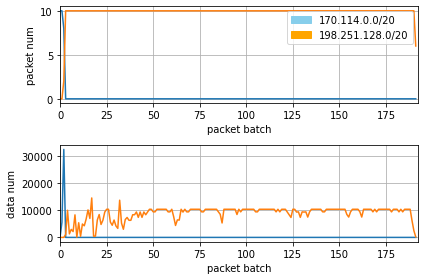

In [45]:
import matplotlib.patches as mpatches
ip1_data = []
ip2_data = []
ip1_pkt = []
ip2_pkt = []

win_pkt1 = 0
win_pkt2 = 0
win_data1 = 0
win_data2 = 0
for i,info in enumerate(Connections):
    if info['ip']==0:
        win_pkt1+=1
        win_data1+=max(1, info['len'])
    else:
        win_pkt2+=1
        win_data2+=max(1, info['len'])
        
    if (i+1)%10==0:
        ip1_data.append(win_data1)
        ip2_data.append(win_data2)
        ip1_pkt.append(win_pkt1)
        ip2_pkt.append(win_pkt2)
        win_pkt1 = 0
        win_pkt2 = 0
        win_data1 = 0
        win_data2 = 0
ip1_data.append(win_data1)
ip2_data.append(win_data2)
ip1_pkt.append(win_pkt1)
ip2_pkt.append(win_pkt2)

t = np.arange(0, len(ip1_data), 1)
print(len(t))

fig, axs = plt.subplots(2,1)
axs[0].plot(t, ip1_pkt, t, ip2_pkt)
axs[0].set_xlim(0, len(t))
axs[0].set_xlabel('packet batch')
axs[0].set_ylabel('packet num')
axs[0].grid(True)

axs[1].plot(t, ip1_data, t, ip2_data)
axs[1].set_xlim(0, len(t))
axs[1].set_xlabel('packet batch')
axs[1].set_ylabel('data num')
axs[1].grid(True)

ip1 = mpatches.Patch(color='skyblue', label='170.114.0.0/20')
ip2 = mpatches.Patch(color='orange', label='198.251.128.0/20')
axs[0].legend(handles=[ip1, ip2])

fig.tight_layout()
plt.show()

In [16]:
len(ip1_pkt)

64

In [7]:
t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 2.997e+01, 2.998e+01,
       2.999e+01])